Problem Statement: Prepare a model for the HR department to predict the Attrition and give the insights from the data about the important factors associated with the attrition so that HR can take the corrective or 
previntive measures to stop or control the attrition.

Attrition Def: Attrition is a term used to describe the gradual and natural reduction in the size of a workforce or customer base over time, typically due to voluntary or involuntary departures, such as resignations,  retirements, terminations, or death. It is often used in the context of human resources or customer management, and can have both positive and negative effects on an organization.

In a positive sense, attrition can help an organization to remove low-performing employees, create room for new talent, and save on costs associated with redundant positions. In a negative sense, however, attrition can result in the loss of experienced and valuable employees or customers, and can increase recruitment and training costs.

Attrition is often measured using metrics such as employee turnover rate or customer churn rate, and organizations may develop strategies to minimize attrition and retain their workforce or customer base.

  Attrition Rate = No. of employees left the workforce/Avg.no. of employess



1.Historical Data: (HR_Employee_Attrition_Data.csv) provided by LEARNBAY.

-The dataset contains Employee demographic information(age, gender, occupation, tenure etc).
-Reasons for leaving or discontinuing use (e.g. better job opportunity,  dissatisfaction, retirement, etc)
-Tenure, years at the current role etc.
-Employee saalry and other perks.
-Performance metrics (performance rating/satisfaction, job satisfaction).

2.How to use the information provided in the dataset?

-Identifying the key features to find the reasons and drwaing insights to   undestand the reason for employee turnover by  expolring and analysing the features and patterns.

3.How your analysis and insghts drawn help HR department?
-Targeted interventions to address the specific issues that are driving employees away.
-To improve the onboarding process and ensure that new employees feel supported and engaged from day one.
-Implement interventions to improve employee satisfaction and engagement.
-To provide benifits, oppurtunities for career growth by creating positive  work culture.


Attrition data analysis(EDA) icludes
-Understanding the data.
-Pre-processing the data.
-Exploring the data.
-Transform the data.
-Data Modeling.
-Data Visualization.
-Data Communication.

# Exploratory data analysis(Attrition Dataset)

Import all the modules and the libraries required

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# from sklearn.externals.six import StringIO 
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz

from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
#import the dataset
df = pd.read_csv('HR_Employee_Attrition_Data.csv')

In [3]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,6,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,7,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,8,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,9,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,10,...,2,80,2,17,3,2,7,7,7,7


In [4]:
df.shape

(2940, 35)

In [5]:
df.info() #to check null data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [6]:
df.isnull().values.any() #Checking if any missing values present

False

In [7]:
# del df['Unnamed: 10']

In [8]:
df.isnull().values.sum()

0

In [9]:
df.describe() # 5 Number Summary

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,848.849221,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,735.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,2205.250000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2940.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2940.0,36.923810,9.133819,18.0,30.00,36.0,43.00,60.0
DailyRate,2940.0,802.485714,403.440447,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,2940.0,9.192517,8.105485,1.0,2.00,7.0,14.00,29.0
Education,2940.0,2.912925,1.023991,1.0,2.00,3.0,4.00,5.0
EmployeeCount,2940.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,2940.0,1470.500000,848.849221,1.0,735.75,1470.5,2205.25,2940.0
EnvironmentSatisfaction,2940.0,2.721769,1.092896,1.0,2.00,3.0,4.00,4.0
HourlyRate,2940.0,65.891156,20.325969,30.0,48.00,66.0,84.00,100.0
JobInvolvement,2940.0,2.729932,0.711440,1.0,2.00,3.0,3.00,4.0
JobLevel,2940.0,2.063946,1.106752,1.0,1.00,2.0,3.00,5.0


The 'Attrition' feature will be our dependent variable/feature and rest all independent valriables/features

In [11]:
# Categorical columns
df.select_dtypes(include='object').columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [12]:
len(df.select_dtypes(include='object').columns)

9

In [13]:
# numerical columns
df.select_dtypes(include='int64').columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [14]:
len(df.select_dtypes(include='int64').columns)

26

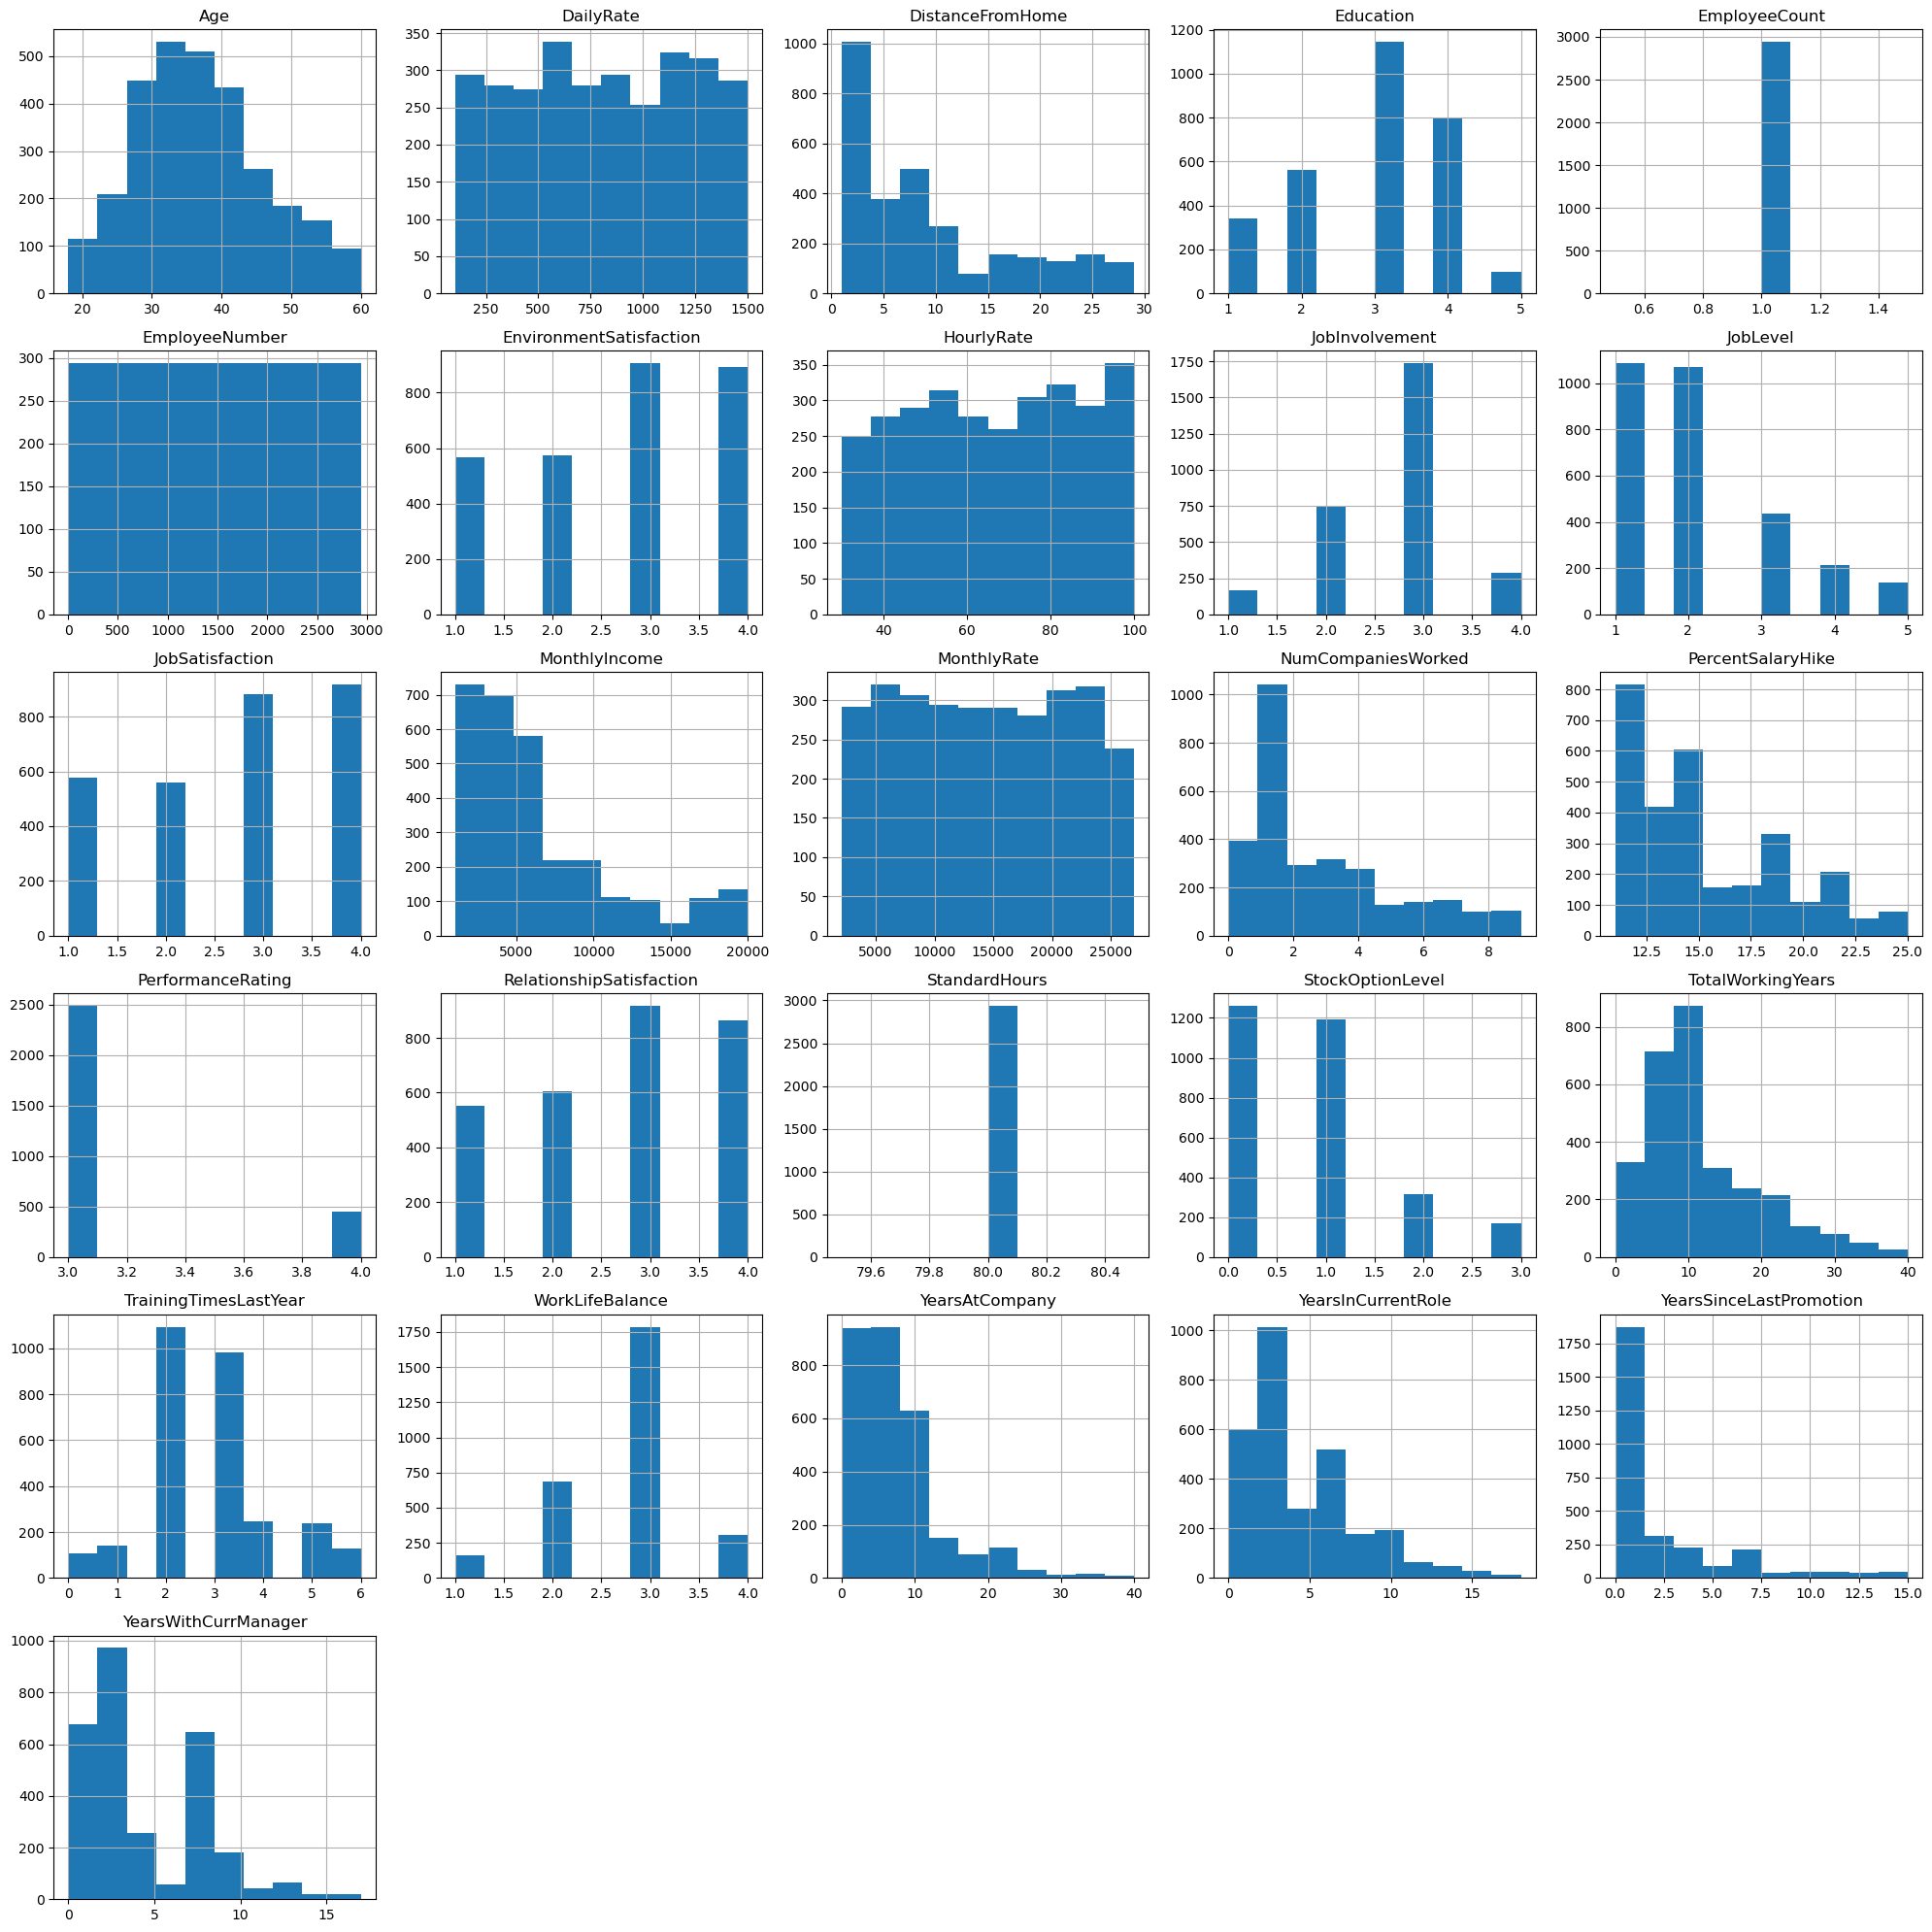

In [15]:
df.hist(figsize =(20,20))
plt.tight_layout()
plt.show()

In [16]:
df.Age.skew(), df.DistanceFromHome.skew(), df.MonthlyIncome.skew(), df.NumCompaniesWorked.skew(),
df.PercentSalaryHike.skew(), df.TotalWorkingYears.skew(), df.YearsAtCompany.skew(), df.YearsInCurrentRole.skew()

(0.8207086405356568, 1.1166013335756102, 1.76362834141509, 0.9168946757013059)

In [17]:
df.Age.kurtosis(), df.DistanceFromHome.kurtosis(), df.MonthlyIncome.kurtosis(), df.NumCompaniesWorked.kurtosis(),
df.PercentSalaryHike.kurtosis(), df.TotalWorkingYears.kurtosis(), df.YearsAtCompany.kurtosis(), df.YearsInCurrentRole.kurtosis()

(-0.30212906828009656, 0.9146652210655, 3.926771682320046, 0.4745664051106644)

By seeing the Histograms we cany say that most of the distibutions are right-skewed.
Age feature is not that right skewed. most of the employees are between 25-40 years age group.
Features like EmployeeCount and StandardHours can be ignored as they donot have relevant information useful to us.

In [18]:
#We can drop columns/features of no important or relavent
df['EmployeeCount'].nunique()


1

In [19]:
df['EmployeeCount'].nunique()


1

In [20]:
df['Over18'].nunique()


1

In [21]:
df['StandardHours'].nunique()

1

In [22]:
 df = df.drop(columns=['EmployeeCount',  'Over18', 'StandardHours'])

In [23]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,3,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,5,1,...,3,4,1,6,3,3,2,2,2,2


In [24]:
df.shape #we have dropped 3 features so shape (2940,32)

(2940, 32)

In [25]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,2940.0,36.923810,9.133819,18.0,30.00,36.0,43.00,60.0
DailyRate,2940.0,802.485714,403.440447,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,2940.0,9.192517,8.105485,1.0,2.00,7.0,14.00,29.0
Education,2940.0,2.912925,1.023991,1.0,2.00,3.0,4.00,5.0
EmployeeNumber,2940.0,1470.500000,848.849221,1.0,735.75,1470.5,2205.25,2940.0
EnvironmentSatisfaction,2940.0,2.721769,1.092896,1.0,2.00,3.0,4.00,4.0
HourlyRate,2940.0,65.891156,20.325969,30.0,48.00,66.0,84.00,100.0
JobInvolvement,2940.0,2.729932,0.711440,1.0,2.00,3.0,3.00,4.0
JobLevel,2940.0,2.063946,1.106752,1.0,1.00,2.0,3.00,5.0
JobSatisfaction,2940.0,2.728571,1.102658,1.0,2.00,3.0,4.00,4.0


C:\Users\swara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


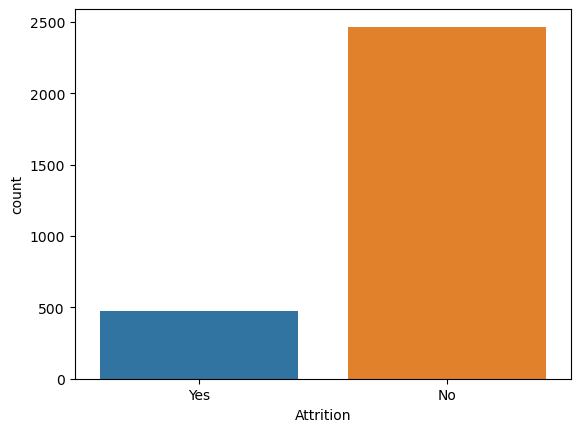

In [26]:
sns.countplot(df['Attrition']) 
plt.show()
#Attrition Count (tells about the employees left and working in the company)

In [27]:
# Employees left the company
(df.Attrition == 'Yes').sum()

474

In [28]:
# Employees with the company
(df.Attrition == 'No').sum()

2466

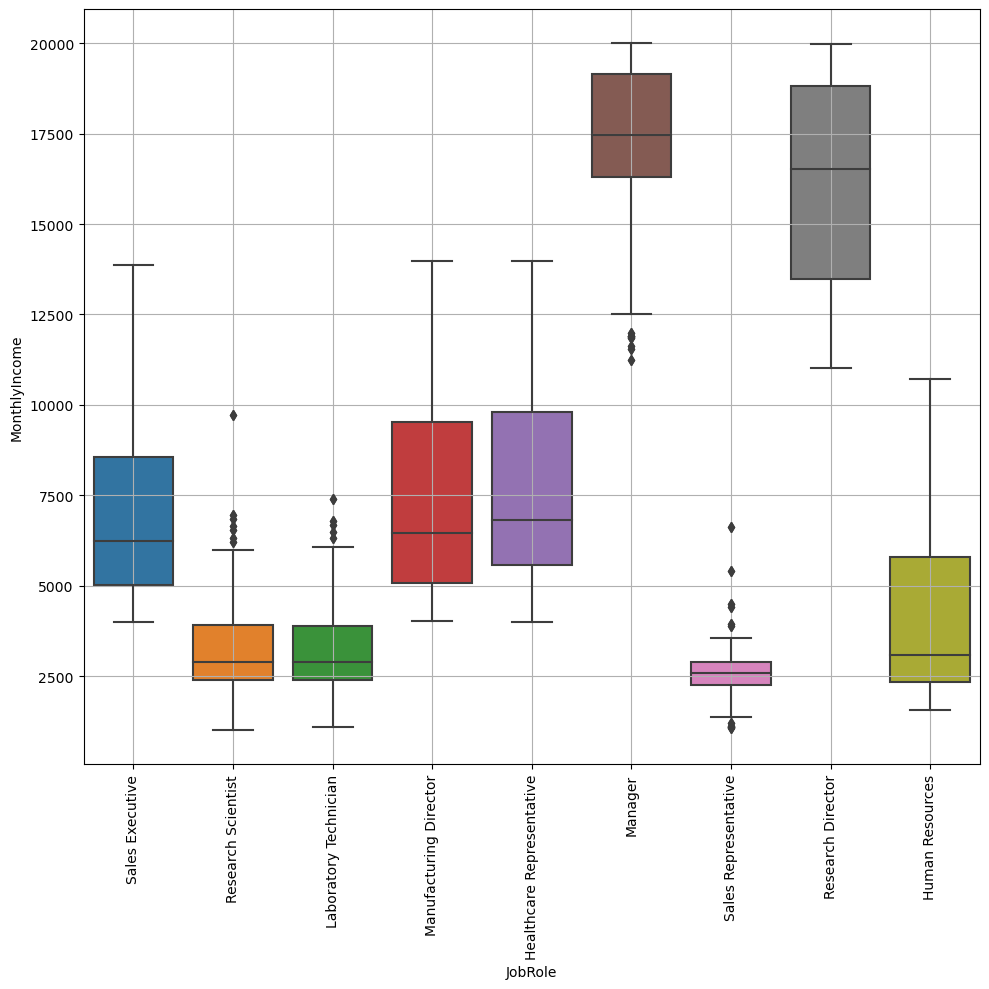

In [29]:
fig, ax = plt.subplots(1, figsize=(10, 10))
sns.boxplot(y=df['MonthlyIncome'], x=df['JobRole'])
plt.grid(True, alpha =1)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

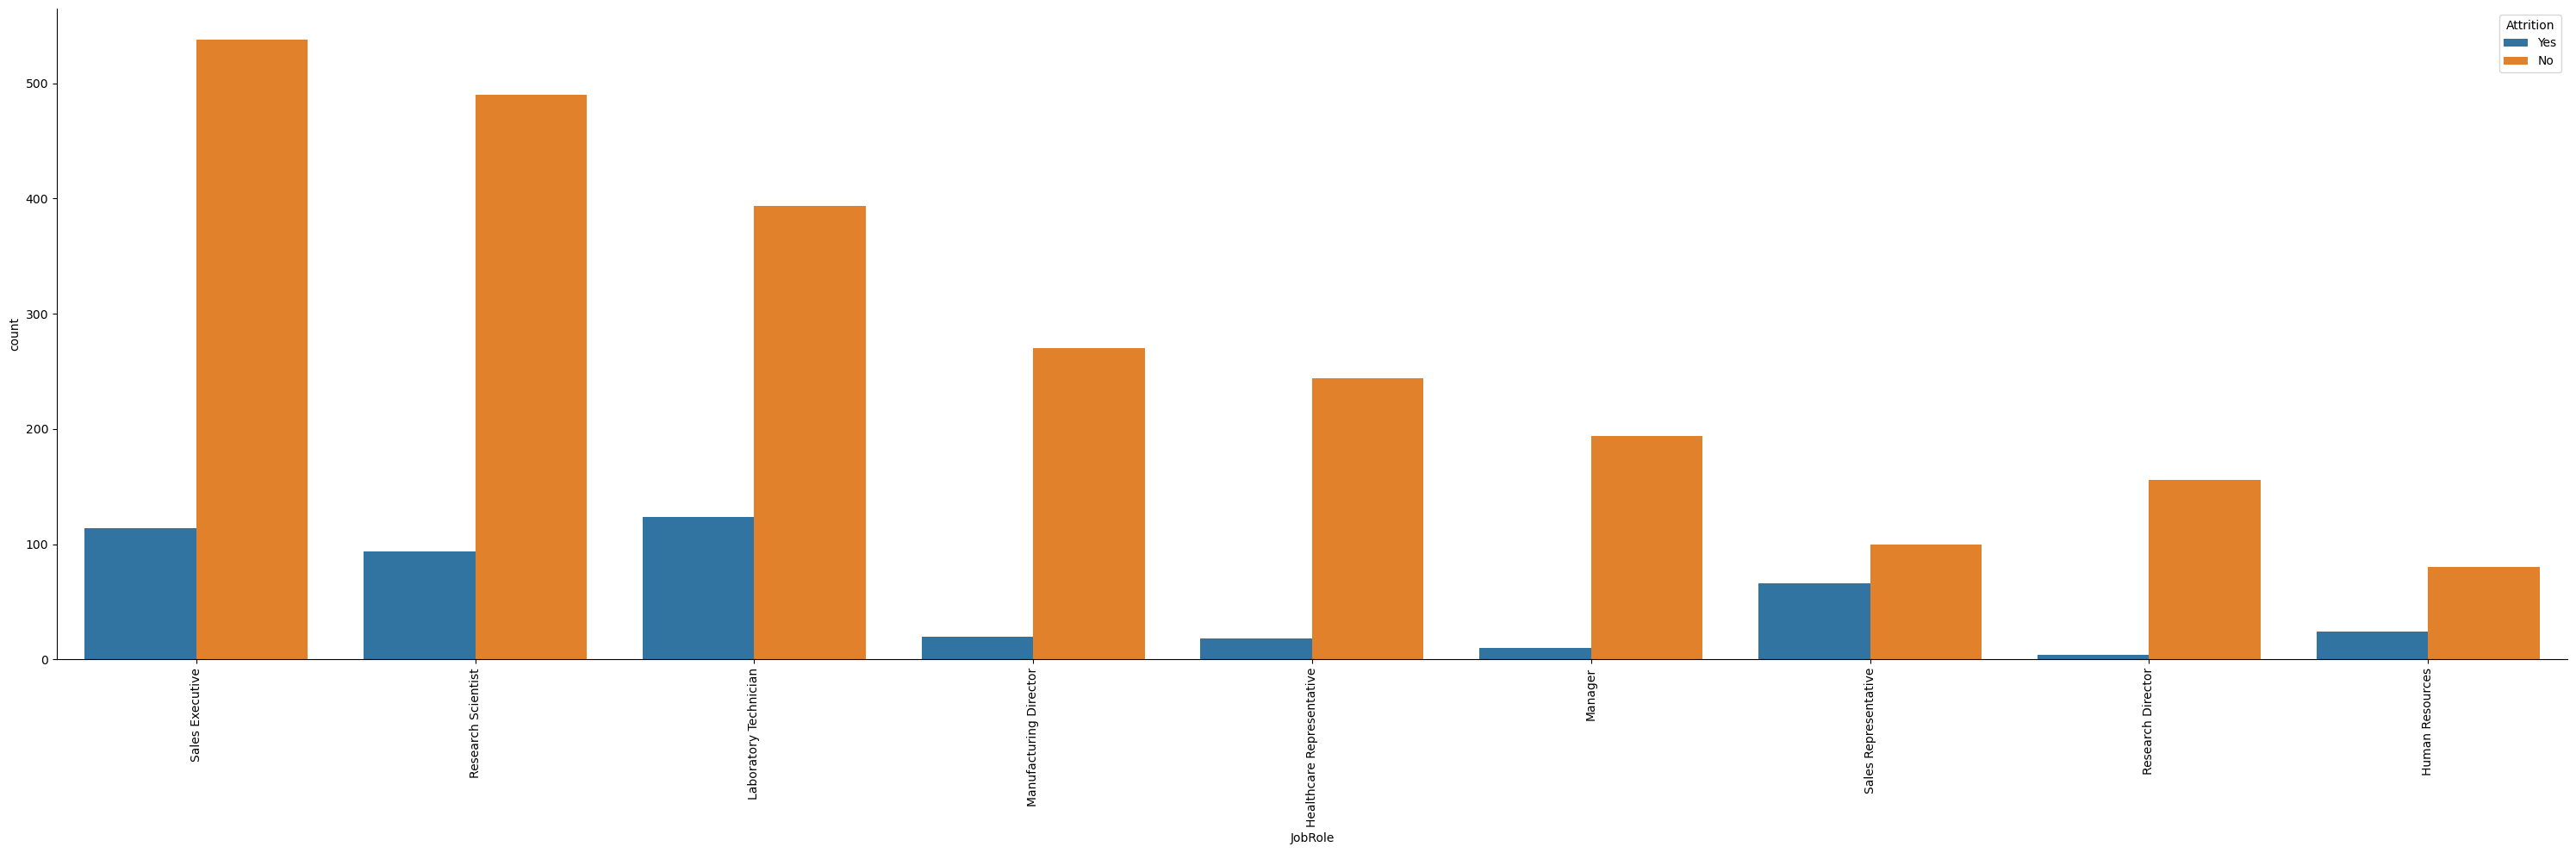

In [30]:
# fig, ax = plt.subplots(1, figsize=(10, 10))
sns.catplot(x='JobRole', hue ='Attrition', data =df, kind ='count', height =10 , aspect =3,legend =False)
plt.legend(loc='upper right', title ='Attrition')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Department', ylabel='count'>

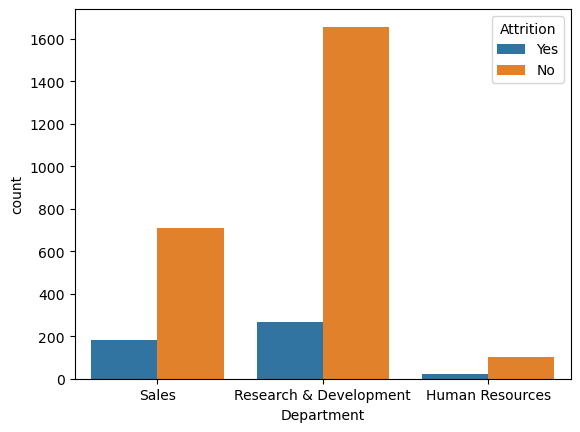

In [31]:

sns.countplot(x='Department', hue='Attrition', data=df)


<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

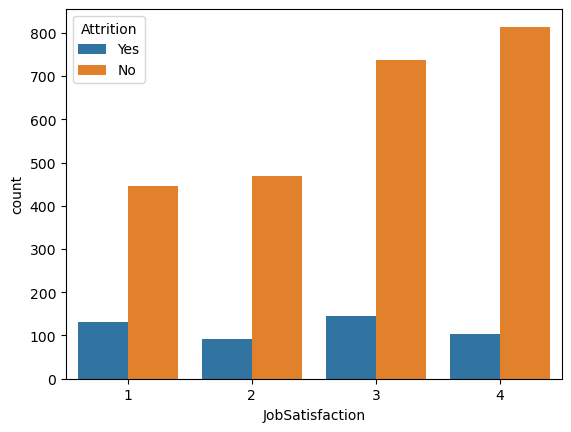

In [32]:

sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)

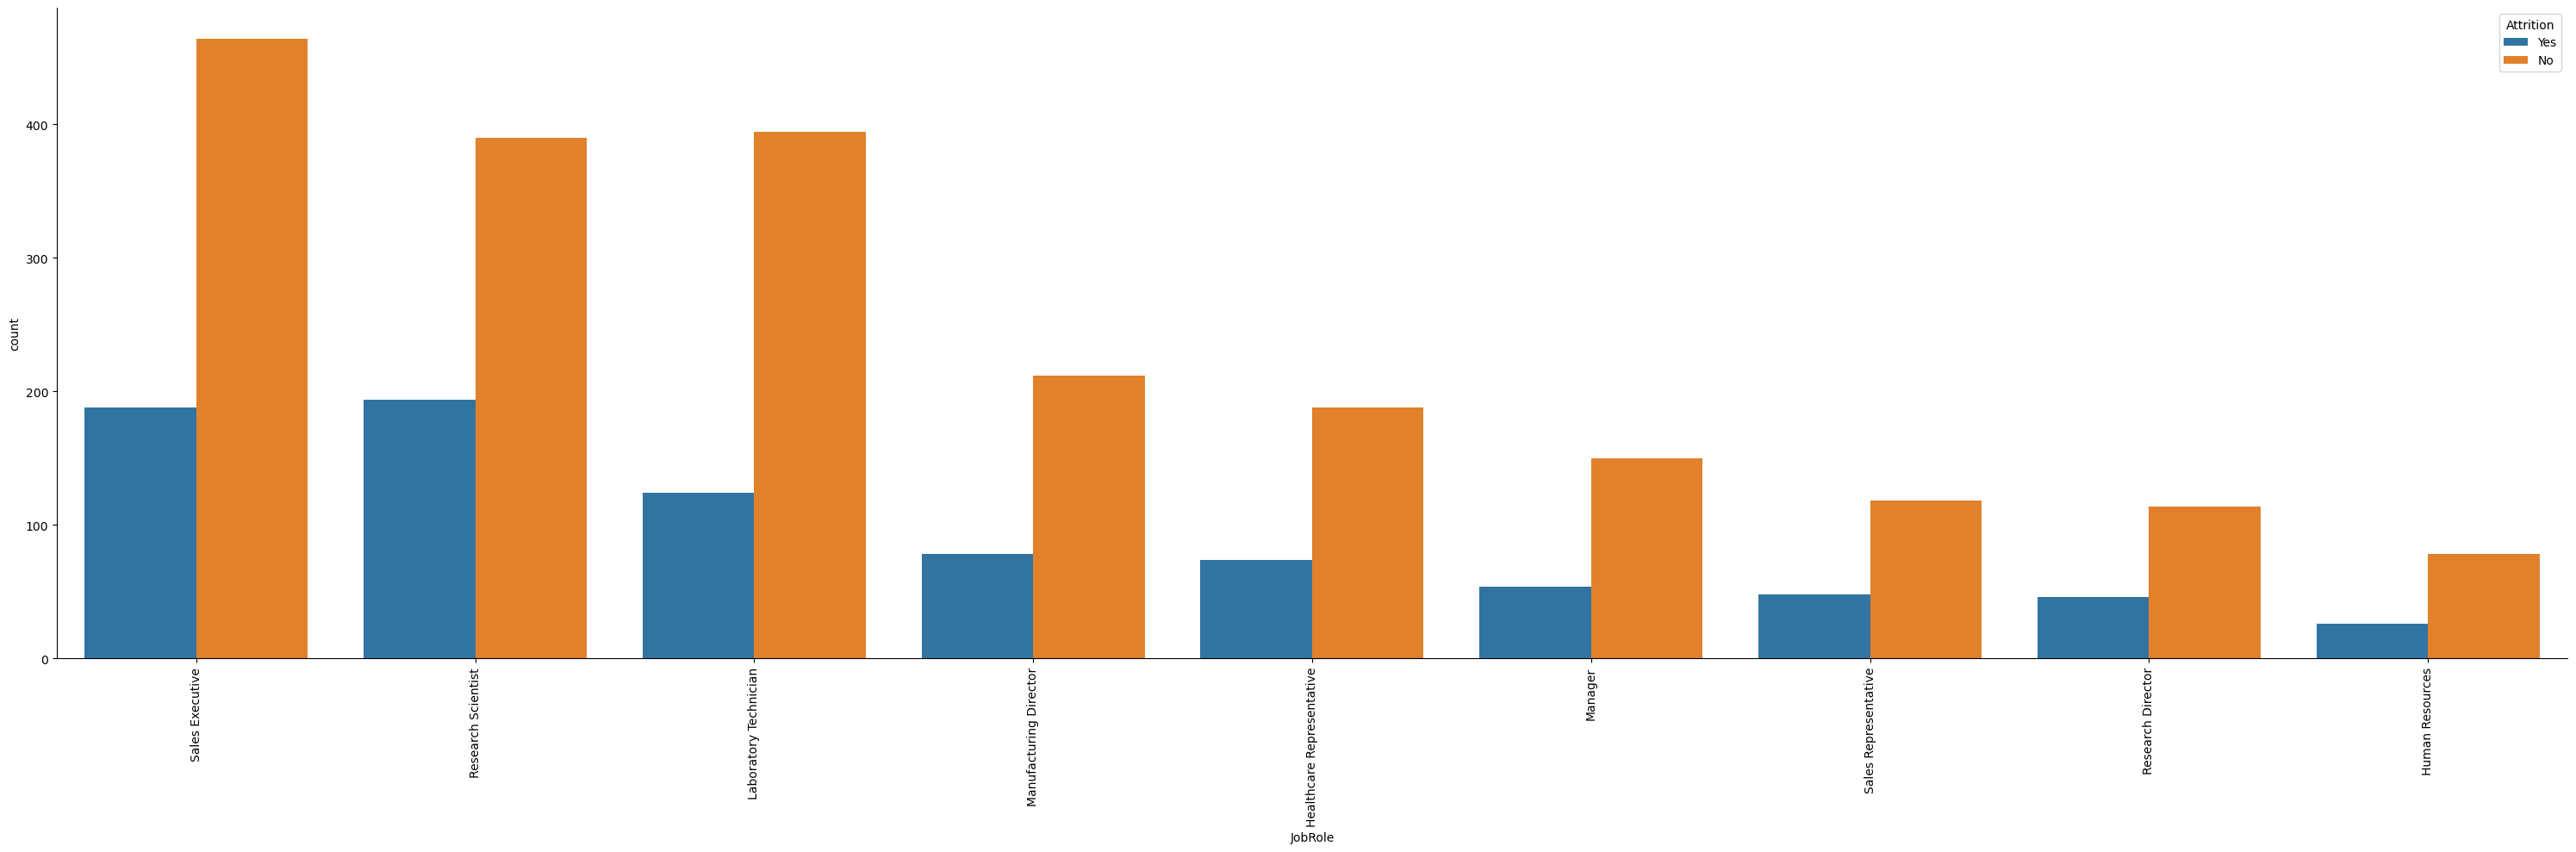

In [33]:
sns.catplot(x='JobRole', hue ='OverTime', data =df, kind ='count', height =10 , aspect =3,legend =False)
plt.legend(loc='upper right', title ='Attrition')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

By seeing the above box plot and other plots we can infer that the monthly income for Manager and Research Director job roles is high compared to the other. So there can be less chance of attrition in these job roles.
On the other hand monthly income is very less for Research Scientist, Laboratory Technichian and Sales Representative. So there is can be high chance of attrition in these job roles.

In [34]:
# Categorical columns
df.select_dtypes(include='object').columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [35]:
#converting object datatypes to categorical datatypes.
for column in df.columns:
    if df[column].dtype =='object':
        df[column] = df[column].astype('category')
        df[column] = df[column].astype('category').cat.codes
        

In [36]:
corr = df.corr()

In [37]:
corr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,-0.005175,0.010146,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.005184,-0.103369,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,-0.007905,0.004174,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,-0.025742,0.018355,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.005183,-0.019395,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,0.016464,-0.016075,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,0.020950,-0.027128,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,-0.001229,0.043163,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeNumber,-0.005175,-0.005184,-0.007905,-0.025742,-0.005183,0.016464,0.020950,-0.001229,1.000000,0.008712,...,-0.010338,-0.034827,0.031226,-0.007047,0.011953,0.005370,-0.005779,-0.004427,-0.004575,-0.004716
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,0.008712,1.000000,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999


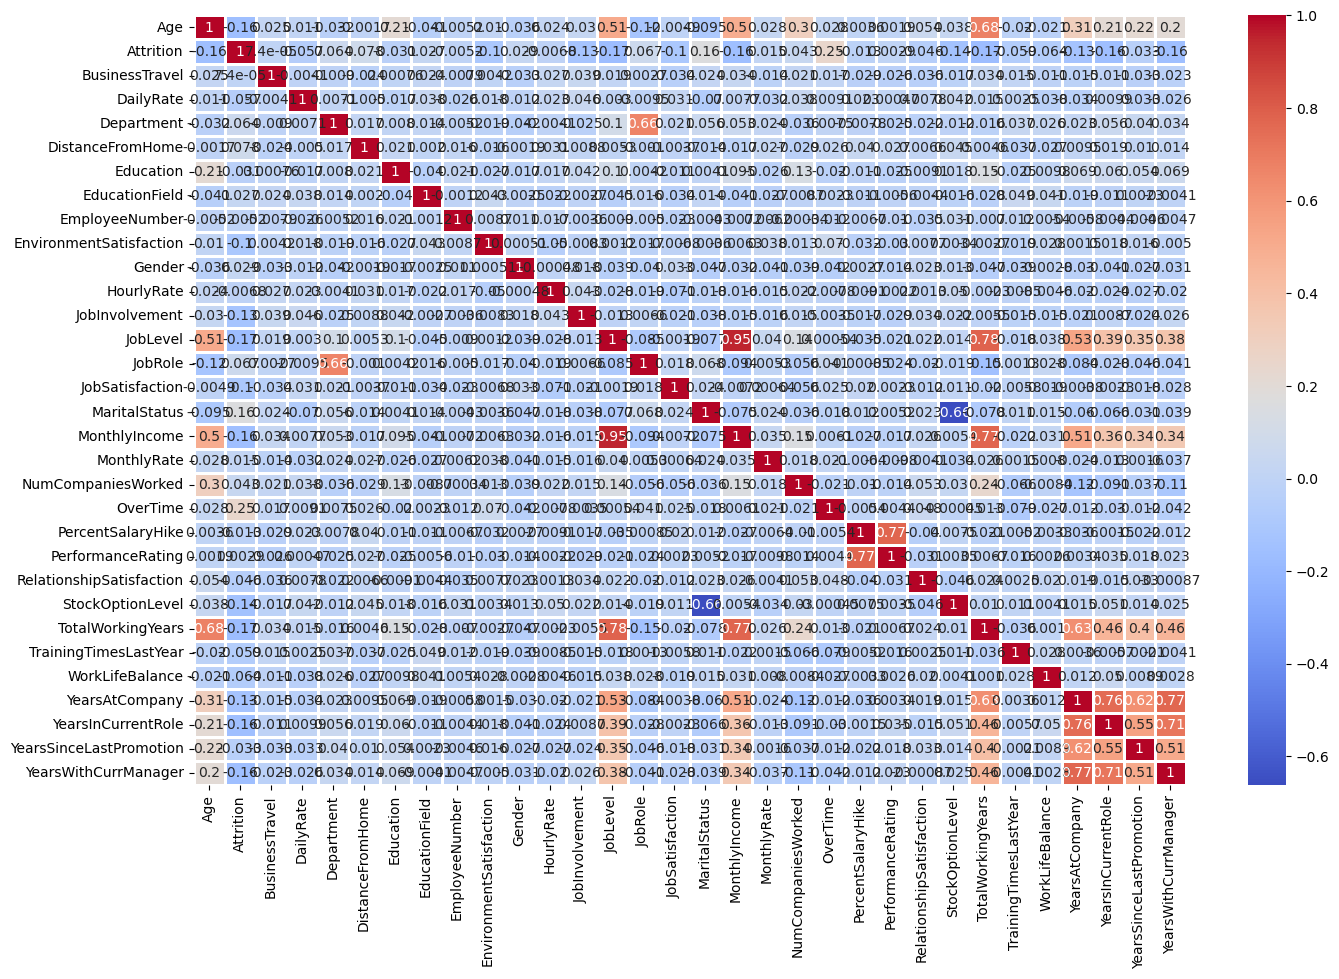

In [38]:
#Map/Matrix showing correlation between features
plt.figure(figsize =(16,10))
ax = sns.heatmap(corr, annot=True, linewidths =1, cmap='coolwarm')

In [39]:
corr_matrix = df.corr()

# Find highly correlated features
corr_threshold = 0.4
corr_pairs = {}
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            corr_pairs[corr_matrix.columns[i] + " - " + corr_matrix.columns[j]] = corr_matrix.iloc[i, j]

# Print highly correlated features
for pair, corr in corr_pairs.items():
    print(pair + " : " + str(corr))

JobLevel - Age : 0.5096042284323848
JobRole - Department : 0.6624311978258453
MonthlyIncome - Age : 0.49785456692657803
MonthlyIncome - JobLevel : 0.950299913479849
PerformanceRating - PercentSalaryHike : 0.7735499964012661
StockOptionLevel - MaritalStatus : -0.6625772916604322
TotalWorkingYears - Age : 0.6803805357911965
TotalWorkingYears - JobLevel : 0.7822078045362764
TotalWorkingYears - MonthlyIncome : 0.7728932462543567
YearsAtCompany - JobLevel : 0.5347386873756313
YearsAtCompany - MonthlyIncome : 0.5142848257331961
YearsAtCompany - TotalWorkingYears : 0.628133155268247
YearsInCurrentRole - TotalWorkingYears : 0.4603646380118078
YearsInCurrentRole - YearsAtCompany : 0.7587537366134599
YearsSinceLastPromotion - TotalWorkingYears : 0.40485775850255795
YearsSinceLastPromotion - YearsAtCompany : 0.6184088652176057
YearsSinceLastPromotion - YearsInCurrentRole : 0.5480562476995186
YearsWithCurrManager - TotalWorkingYears : 0.4591883970831444
YearsWithCurrManager - YearsAtCompany : 0.76

In [40]:
# calculate correlation coefficients
correlations = df.corr()['Attrition'].drop('Attrition')

# print correlation coefficients in descending order
print(correlations.sort_values(ascending=False))

OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
EmployeeNumber             -0.005184
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
M

In [41]:
#Split the dataset for training testing
# features


X = df.drop(columns='Attrition', axis= 1)
# target variable
y = df['Attrition']

In [42]:
#important features for predicting Attrition
from sklearn.ensemble import ExtraTreesClassifier
# Tree-based feature selection using ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)
k = 35
# get the feature importances and indices of top k features
importances = pd.Series(model.feature_importances_, index=X.columns)
indices = importances.sort_values(ascending=False)[:k].index

# select the top k features from the original DataFrame
X_selected = df[indices]
# save the x_selected DataFrame to a CSV file
X_selected.to_csv('top_features.csv', index=False)

In [43]:
X_selected

,OverTime,Age,MonthlyIncome,TotalWorkingYears,JobSatisfaction,EnvironmentSatisfaction,DistanceFromHome,YearsAtCompany,MaritalStatus,YearsWithCurrManager,...,TrainingTimesLastYear,StockOptionLevel,YearsSinceLastPromotion,MonthlyRate,Education,Department,BusinessTravel,Gender,PerformanceRating,EmployeeNumber
0,1,41,5993,8,4,2,1,6,2,5,...,0,0,0,19479,2,2,2,0,3,1
1,0,49,5130,10,2,3,8,10,1,7,...,3,1,1,24907,1,1,1,1,4,2
2,1,37,2090,7,3,4,2,0,2,0,...,3,0,0,2396,2,1,2,1,3,3
3,1,33,2909,8,3,4,3,8,1,0,...,3,0,3,23159,4,1,1,0,3,4
4,0,27,3468,6,2,1,2,2,1,2,...,3,1,2,16632,1,1,2,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,0,36,2571,17,4,3,23,5,1,3,...,3,1,0,12290,2,1,1,1,3,2936
2936,0,39,9991,9,1,4,6,7,1,7,...,5,1,1,21457,1,1,2,1,3,2937
2937,1,27,6142,6,2,2,4,6,1,3,...,0,1,0,5174,3,1,2,1,4,2938
2938,0,49,5390,17,2,4,2,9,1,8,...,3,0,0,13243,3,2,1,1,3,2939


By seeing the correlation matrix we can infer that 'Attrition (Target Feature) has -ve correlation with 'Age, JobInvolvement, JobLevel, MontlyIncome, JobSatisfaction, etc., +ve corelation with OverTime, DistanceFromHome, NumberofCompaniesWorked etc

# Splitting the dataset in 80:20(80% train data, 20% test data)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [45]:
print(X_train.shape, type(X_train))

(2352, 31) <class 'pandas.core.frame.DataFrame'>


In [46]:
print(y_train.shape, type(y_train))

(2352,) <class 'pandas.core.series.Series'>


In [47]:
print(X_test.shape, type(X_test))

(588, 31) <class 'pandas.core.frame.DataFrame'>


In [48]:
print(y_test.shape, type(y_test))

(588,) <class 'pandas.core.series.Series'>


# Feature Sclaing/Standerdization

In [49]:
#Standerdization of data/Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
print(X_train, X_train.shape, type(X_train))

[[-1.74108317  0.59277358 -0.61612612 ... -0.60151262 -0.05129322
  -0.58424265]
 [-0.53984304 -0.92431398  1.28161321 ... -0.87590317 -0.67315735
  -0.30466204]
 [ 1.20741534  0.59277358 -0.6558174  ... -1.15029372 -0.67315735
  -1.14340388]
 ...
 [-1.19506493 -0.92431398  0.74826163 ...  0.77044013  1.50336713
   0.81366041]
 [ 0.8798044   0.59277358 -1.49181499 ... -1.15029372 -0.67315735
  -1.14340388]
 [-0.43063939  0.59277358 -1.60592742 ... -0.05273152 -0.36222528
  -0.02508142]] (2352, 31) <class 'numpy.ndarray'>


In [51]:
print(y_train.shape, type(y_train))

(2352,) <class 'pandas.core.series.Series'>


In [52]:
print(X_test,X_test.shape, type(X_test))

[[-0.10302844  0.59277358 -0.29363447 ...  0.77044013 -0.67315735
   0.25449919]
 [-0.10302844  0.59277358  0.60934215 ... -0.05273152 -0.67315735
  -0.02508142]
 [-0.53984304  0.59277358 -0.51193651 ...  2.14239289  2.7470954
   1.37282164]
 ...
 [-0.75825033  0.59277358  1.19230783 ...  1.04483069 -0.36222528
   1.37282164]
 [-1.08586128  0.59277358 -1.46204653 ... -0.60151262  0.57057092
  -0.02508142]
 [-0.86745398 -0.92431398 -0.953502   ... -0.60151262 -0.67315735
  -0.58424265]] (588, 31) <class 'numpy.ndarray'>


In [53]:
print(y_test.shape, type(y_test))

(588,) <class 'pandas.core.series.Series'>


Our objective is to predict the Attrition and give insights to HR Department to make further strategies to retain the talent and to find the replacement at the earliest.

Predicting Attrition (Target Feature) is a supervised binary classification task ( Either the employee stays or leaves the Company i.e. 1,0). 
There are different type of Supervised Machine Learning Algorithms to classify the features and a predict the future with best accuracy.
1.Decision Tree Classification
2.Random Forest
3.Logistic Regression
4.SVM Algorithm
We will compare accuracy scores for estimated predictions by the above mentioned classification models and predict the Attrition with best accuracy.
we need to train the Model and test the trained model to predict the future followed by Model Evaluation.


# Decision Tree Classification (Building the Model)

In [54]:
from sklearn.tree import DecisionTreeClassifier


In [55]:
# Decision tree with depth = 2
model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=2, min_samples_split =5, min_samples_leaf = 3, criterion = "gini" )
model_dt_2.fit(X_train, y_train)
model_dt_2_score_train = model_dt_2.score(X_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt_2.score(X_test, y_test)
print("Testing score: ",model_dt_2_score_test)
#y_pred_dt = model_dt_2.predict_proba(x_test)[:, 1]

Training score:  0.844812925170068
Testing score:  0.8656462585034014


In [56]:
# Decision tree with depth = 4
model_dt_4 = DecisionTreeClassifier(random_state=1, max_depth=4, min_samples_split =5, min_samples_leaf = 3, criterion = "gini")
model_dt_4.fit(X_train, y_train)
model_dt_4_score_train = model_dt_4.score(X_train, y_train)
print("Training score: ",model_dt_4_score_train)
model_dt_4_score_test = model_dt_4.score(X_test, y_test)
print("Testing score: ",model_dt_4_score_test)


Training score:  0.8720238095238095
Testing score:  0.8758503401360545


In [57]:
# Decision tree with depth = 6
model_dt_6 = DecisionTreeClassifier(random_state=1, max_depth=6, min_samples_split =4, min_samples_leaf =3, criterion = "gini")
model_dt_6.fit(X_train, y_train)
model_dt_6_score_train = model_dt_6.score(X_train, y_train)
print("Training score: ",model_dt_6_score_train)
model_dt_6_score_test = model_dt_6.score(X_test, y_test)
print("Testing score: ",model_dt_6_score_test)

Training score:  0.907312925170068
Testing score:  0.8979591836734694


In [58]:
# Decision tree with depth = 8
model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=8, min_samples_split =5, min_samples_leaf = 2, criterion = "gini")
model_dt_8.fit(X_train, y_train)
model_dt_8_score_train = model_dt_8.score(X_train, y_train)
print("Training score: ",model_dt_8_score_train)
model_dt_8_score_test = model_dt_8.score(X_test, y_test)
print("Testing score: ",model_dt_8_score_test)

Training score:  0.9379251700680272
Testing score:  0.9064625850340136


In [59]:
# Decision tree with depth = 8
model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=8, min_samples_split =5, min_samples_leaf = 5, criterion = "gini")
model_dt_8.fit(X_train, y_train)
model_dt_8_score_train = model_dt_8.score(X_train, y_train)
print("Training score: ",model_dt_8_score_train)
model_dt_8_score_test = model_dt_8.score(X_test, y_test)
print("Testing score: ",model_dt_8_score_test)

Training score:  0.9294217687074829
Testing score:  0.9081632653061225


In [60]:
# Decision tree with depth = 10
model_dt_10 = DecisionTreeClassifier(random_state=1, max_depth=10, min_samples_split =7, min_samples_leaf = 2, criterion = "gini")
model_dt_10.fit(X_train, y_train)
model_dt_10_score_train = model_dt_10.score(X_train, y_train)
print("Training score: ",model_dt_10_score_train)
model_dt_10_score_test = model_dt_10.score(X_test, y_test)
print("Testing score: ",model_dt_10_score_test)

Training score:  0.9553571428571429
Testing score:  0.8945578231292517


In [61]:
# Decision tree with depth = 10
model_dt_10 = DecisionTreeClassifier(random_state=1, max_depth=10, min_samples_split =5, min_samples_leaf = 3, criterion = "gini")
model_dt_10.fit(X_train, y_train)
model_dt_10_score_train = model_dt_10.score(X_train, y_train)
print("Training score: ",model_dt_10_score_train)
model_dt_10_score_test = model_dt_10.score(X_test, y_test)
print("Testing score: ",model_dt_10_score_test)

Training score:  0.9570578231292517
Testing score:  0.8860544217687075


In [62]:
# Decision tree with depth = 10
model_dt_10 = DecisionTreeClassifier(random_state=1, max_depth=10, min_samples_split =3, min_samples_leaf = 2, criterion = "gini")
model_dt_10.fit(X_train, y_train)
model_dt_10_score_train = model_dt_10.score(X_train, y_train)
print("Training score: ",model_dt_10_score_train)
model_dt_10_score_test = model_dt_10.score(X_test, y_test)
print("Testing score: ",model_dt_10_score_test)

Training score:  0.9651360544217688
Testing score:  0.8996598639455783


In [63]:
# # Decision tree with depth = 13
model_dt_13 = DecisionTreeClassifier(random_state=1, max_depth=13, min_samples_split =8, min_samples_leaf = 2, criterion = "gini")
model_dt_13.fit(X_train, y_train)
model_dt_13_score_train = model_dt_13.score(X_train, y_train)
print("Training score: ",model_dt_13_score_train)
model_dt_13_score_test = model_dt_13.score(X_test, y_test)
print("Testing score: ",model_dt_13_score_test)

Training score:  0.9621598639455783
Testing score:  0.8979591836734694


In [64]:
# # Decision tree with depth = 13
model_dt_13 = DecisionTreeClassifier(random_state=42, max_depth=14, min_samples_split =13, min_samples_leaf = 3, criterion = "gini")
model_dt_13.fit(X_train, y_train)
model_dt_13_score_train = model_dt_13.score(X_train, y_train)
print("Training score: ",model_dt_13_score_train)
model_dt_13_score_test = model_dt_13.score(X_test, y_test)
print("Testing score: ",model_dt_13_score_test)

Training score:  0.9447278911564626
Testing score:  0.8775510204081632


In [65]:
#Decision tree

model_dt = DecisionTreeClassifier(max_depth=10, min_samples_split =3, min_samples_leaf = 2,criterion ="entropy")
model_dt.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=3)

In [66]:
y_pred_dt = model_dt.predict_proba(X_test)[:, 1]

In [67]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

In [68]:
predictions_dt = model_dt.predict(X_test)
predictions_dt

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [69]:

y_test = y_test.to_numpy() # Convert y_test to numpy array
y_actual_result = np.empty((0, 1))
for i in range(len(predictions_dt)):
    if i < len(y_test) and predictions_dt[i] == 1:
        y_actual_result = np.vstack((y_actual_result, y_test[i].reshape(-1, 1)))


In [70]:
#Recall
y_actual_result = y_actual_result.flatten()
count = 0
for result in y_actual_result:
     if(result == 1):
        count=count+1

print ("true yes|predicted yes:")
print (count/float(len(y_actual_result)))

true yes|predicted yes:
0.6527777777777778


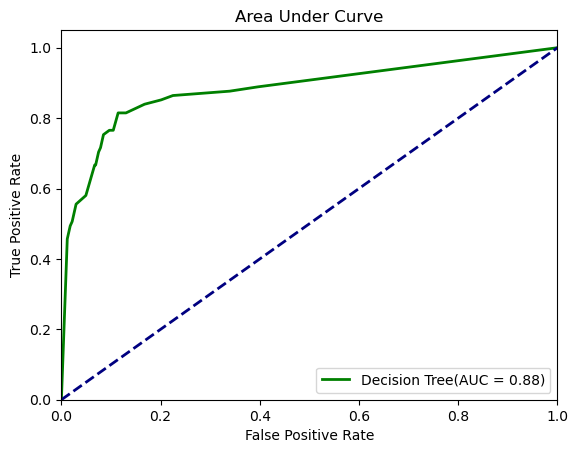

In [71]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [72]:
print (confusion_matrix(y_test, predictions_dt))

[[482  25]
 [ 34  47]]


In [73]:
accuracy_score(y_test, predictions_dt)

0.8996598639455783

In [74]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

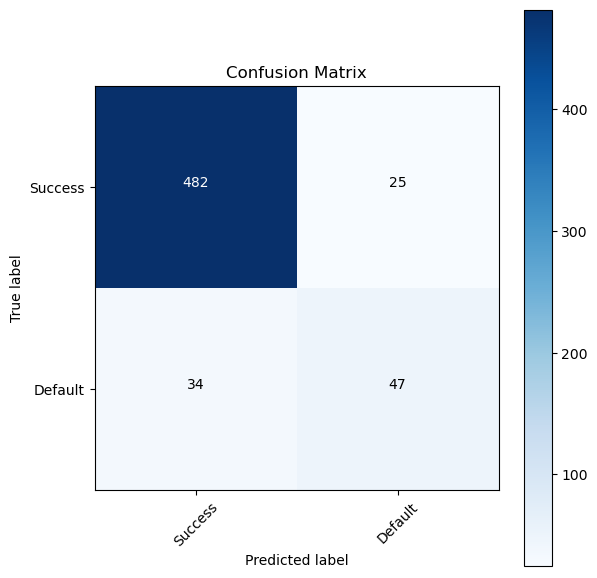

In [75]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions_dt, normalize=False)
plt.show()

In [76]:
model.feature_importances_

array([0.04384547, 0.02381354, 0.03216299, 0.02466135, 0.03672217,
       0.02784312, 0.0317416 , 0.00254385, 0.03701356, 0.0207169 ,
       0.03099357, 0.03247584, 0.03214305, 0.03308265, 0.03796183,
       0.03565601, 0.04325031, 0.02858288, 0.03282265, 0.06848756,
       0.0313997 , 0.01262344, 0.03310717, 0.03009858, 0.0401334 ,
       0.03048595, 0.03421802, 0.03588558, 0.03172867, 0.02947015,
       0.03432844])

In [77]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
Age,0.043845
BusinessTravel,0.023814
DailyRate,0.032163
Department,0.024661
DistanceFromHome,0.036722
Education,0.027843
EducationField,0.031742
EmployeeNumber,0.002544
EnvironmentSatisfaction,0.037014
Gender,0.020717


In [78]:
from sklearn.tree import plot_tree

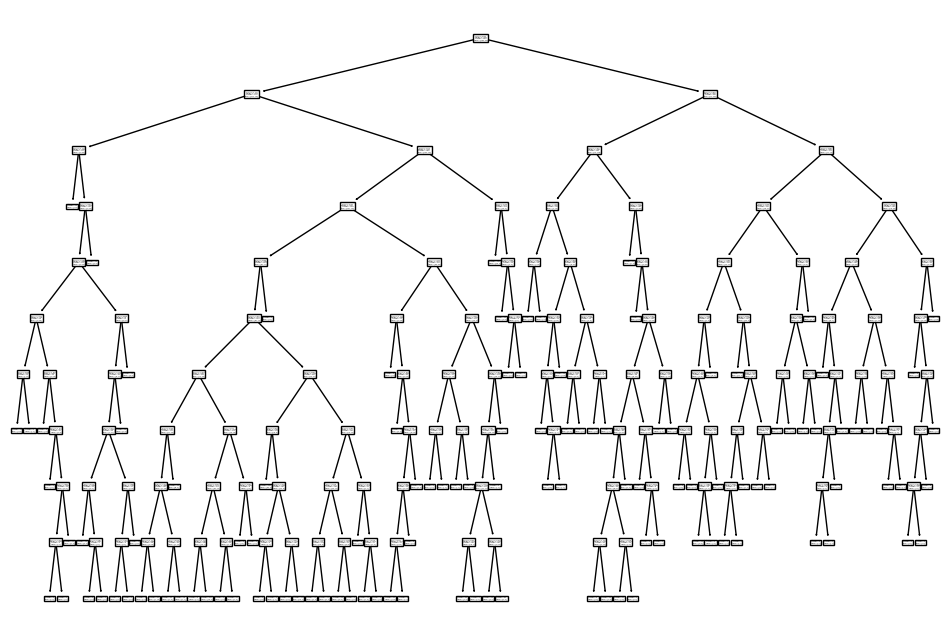

In [79]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Instantiate the classifier with some hyperparameters
dt = DecisionTreeClassifier(max_depth=10, min_samples_split =3, min_samples_leaf = 2,criterion ="entropy", random_state=42)

# Fit the model on your training data
dt.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(12,8))
plot_tree(dt);

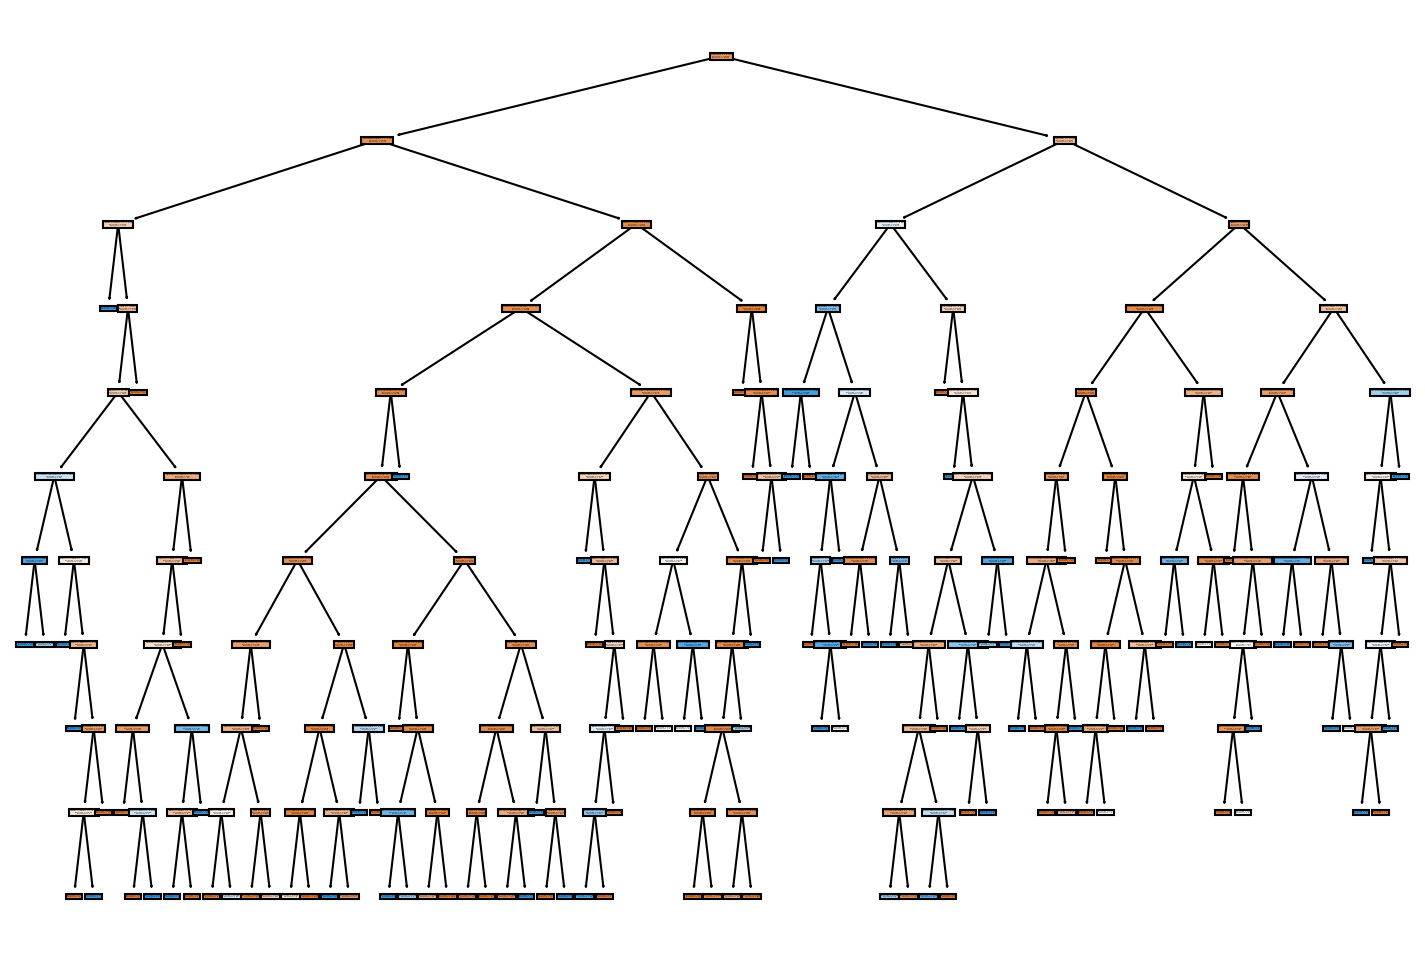

In [80]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(dt,filled=True,feature_names=X.columns);

# Random Forest

In [81]:
# Import modules
%matplotlib inline

import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from urllib.request import urlopen 

In [82]:


names = ['EmployeeNumber', 'Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 
         'Education', 'EducationField', 'EmployeeCount', 'EnvironmentSatisfaction',
         'Gender','HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 
         'MaritalStatus', 'MonthlyIncome',  'MonthlyRate', 'NumCompaniesWorked', 
         'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
         'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 
         'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 
         'YearsSinceLastPromotion', 'YearsWithCurrManage'] 

dx = ['Yes', 'No']

In [83]:
# # Setting ''EmployeeNumber' as our index
# df.set_index(['EmployeeNumber'], inplace = True) 
# # Converted to binary to help later on with models and plots
# df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})

In [84]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,3,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,5,1,...,3,4,1,6,3,3,2,2,2,2


In [85]:
df.apply(lambda x: x.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [86]:
# For later use in CART models
names_index = names[2:]

In [87]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2940.0,36.923810,9.133819,18.0,30.00,36.0,43.00,60.0
Attrition,2940.0,0.161224,0.367800,0.0,0.00,0.0,0.00,1.0
BusinessTravel,2940.0,1.607483,0.665342,0.0,1.00,2.0,2.00,2.0
DailyRate,2940.0,802.485714,403.440447,102.0,465.00,802.0,1157.00,1499.0
Department,2940.0,1.260544,0.527703,0.0,1.00,1.0,2.00,2.0
DistanceFromHome,2940.0,9.192517,8.105485,1.0,2.00,7.0,14.00,29.0
Education,2940.0,2.912925,1.023991,1.0,2.00,3.0,4.00,5.0
EducationField,2940.0,2.247619,1.331143,0.0,1.00,2.0,3.00,5.0
EmployeeNumber,2940.0,1470.500000,848.849221,1.0,735.75,1470.5,2205.25,2940.0
EnvironmentSatisfaction,2940.0,2.721769,1.092896,1.0,2.00,3.0,4.00,4.0


In [88]:
# Set the random state for reproducibility
fit_rf = RandomForestClassifier(random_state=42)

In [89]:
# np.random.seed(42)
# # start = time.time()

# # Select categorical feature columns using loop
# categorical_columns = []
# for column in X.columns:
#     if X[column].dtype == object:
#         categorical_columns.append(column)

# # Define label encoder to transform categorical features
# le = LabelEncoder()

# # Transform categorical features to numerical values
# for column in categorical_columns:
#     X[column] = le.fit_transform(X[column])

# param_dist = {'max_depth': np.arange(2,11),
#               'bootstrap': [True, False],
             
#               'max_features': ['auto', 'sqrt', 'log2', None],
#               'criterion': ['gini', 'entropy']
#               }

# cv_rf = GridSearchCV(fit_rf, cv = 10,
#                      param_grid=param_dist, 
#                      n_jobs = 3)

# cv_rf.fit(X_train, y_train)
# print('Best Parameters using grid search: \n', cv_rf.best_params_)
# # end = time.time()
# # print('Time taken in grid search: {0: .2f}'.format(end - start))

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


# # Select categorical feature columns using loop
categorical_columns = []
for column in X.columns:
    if X[column].dtype == object:
         categorical_columns.append(column)

# # Define label encoder to transform categorical features
le = LabelEncoder()

# # Transform categorical features to numerical values
for column in categorical_columns:
    X[column] = le.fit_transform(X[column])

# # Define decision tree classifier
dt = RandomForestClassifier(random_state=42)

# # Define hyperparameters to search
params = {'max_depth': np.arange(2,11),
               'bootstrap': [True, False],
#                
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'max_features': ['auto', 'sqrt', 'log2', None],
               'criterion': ['gini', 'entropy']
               }


# # Perform grid search using cross-validation
grid_search = GridSearchCV(dt, params, cv=10, scoring="accuracy", n_jobs= 3,)

# # Fit the grid search to the data
grid_search.fit(X, y)

# # Print best parameters and accuracy
print("Best parameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)


KeyboardInterrupt: 

In [ ]:
# Set best parameters given by grid search 
fit_rf.set_params(criterion = 'gini',
                  max_features = 'auto', 
                  max_depth = 10)

In [ ]:
# Set best parameters given by grid search 
fit_rf.set_params(criterion = 'gini',
                  max_features = 'auto', 
                  max_depth = 10)

In [ ]:
fit_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 10
max_estimators = 500

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(X_train, y_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

In [ ]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.080, color='#875FDB',linestyle='--')
plt.axhline(0.068, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 10 to 500 trees)')

In [ ]:
# # Plot the relationship between the number of estimators and the OOB error rate
# # plt.plot(n_estimators_list, oob_error_rates)
# oob_series.plot(kind='line',color = 'red')
# plt.xlabel('Number of Estimators')
# plt.ylabel('OOB Error Rate')
# plt.title('Random Forest OOB Error Rate vs. Number of Estimators')

# # Add a horizontal line at a certain OOB error rate threshold
# threshold = 0.2
# plt.axhline(y=threshold, color='r', linestyle='--')
# plt.text(n_estimators_list[-1], threshold, f'Threshold: {threshold:.2f}', ha='right', va='bottom')
# plt.show()

In [ ]:
print('OOB Error rate for 200 trees is: {0:.5f}'.format(oob_series[350]))

In [ ]:
print('OOB Error rate for 300 trees is: {0:.5f}'.format(oob_series[350]))

In [ ]:
print('OOB Error rate for 400 trees is: {0:.5f}'.format(oob_series[400]))

In [ ]:
# Create a random forest model
model = RandomForestClassifier(n_estimators=300, oob_score=True, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('#fafafa')

oob_scores = []
for i in range(1, 101):
    model = RandomForestClassifier(n_estimators=i, oob_score=True, random_state=42)
    model.fit(X_train, y_train)
    oob_scores.append(1 - model.oob_score_)

ax.plot(np.arange(1, 101), oob_scores, color='red')
plt.axhline(oob_error, color='#875FDB', linestyle='--')
plt.xlabel('Number of trees')
plt.ylabel('Out-of-bag error rate')
plt.title('Out-of-bag error rate vs number of trees')
plt.show()

In [ ]:
print('OOB Error rate for 400 trees is: {0:.5f}'.format(oob_series[100]))

In [ ]:
# Refine the tree via OOB Output
fit_rf.set_params(n_estimators=300,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=True)

In [ ]:
fit_rf.fit(X_train,y_train)

In [ ]:
def variable_importance(fit):
    """
    Purpose
    ----------
    Checks if model is fitted CART model then produces variable importance
    and respective indices in dictionary.

    Parameters
    ----------
    * fit:  Fitted model containing the attribute feature_importances_

    Returns
    ----------
    Dictionary containing arrays with importance score and index of columns
    ordered in descending order of importance.
    """
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

In [ ]:
var_imp_rf = variable_importance(fit_rf)

importances_rf = var_imp_rf['importance']

indices_rf = var_imp_rf['index']

In [ ]:
def print_var_importance(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints dependent variable names ordered from largest to smallest
    based on information gain for CART model.
    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns
    ----------
    Prints feature importance in descending order
    """
    print("Feature ranking:")

    for f in range(0, indices.shape[0]):
        i = f
        print("{0}. The feature '{1}' has a Mean Decrease in Impurity of {2:.5f}"
              .format(f + 1,
                      names_index[indices[i]],
                      importance[indices[f]]))

In [ ]:
# def variable_importance_plot(importance, indices, name_index):
#     """
#     Purpose
#     ----------
#     Prints bar chart detailing variable importance for CART model
#     NOTE: feature_space list was created because the bar chart
#     was transposed and index would be in incorrect order.

#     Parameters
#     ----------
#     * importance: Array returned from feature_importances_ for CART
#                 models organized by dataframe index
#     * indices: Organized index of dataframe from largest to smallest
#                 based on feature_importances_
#     * name_index: Name of columns included in model

#     Returns:
#     ----------
#     Returns variable importance plot in descending order
#     """
#     index = np.arange(len(names_index))

#     importance_desc = sorted(importance)
#     feature_space = []
#     for i in range(indices.shape[0] - 1, -1, -1):
#         feature_space.append(names_index[indices[i]])

#     fig, ax = plt.subplots(figsize=(10, 10))

#     ax.set_axis_bgcolor('#fafafa')
#     plt.title('Feature importances for Random Forest Model\
#     \EmployeeAttrition')
#     plt.barh(index,
#              importance_desc,
#              align="center",
#              color = '#875FDB')
#     plt.yticks(index,
#                feature_space)

#     plt.ylim(-1, 30)
#     plt.xlim(0, max(importance_desc) + 0.01)
#     plt.xlabel('Mean Decrease in Impurity')
#     plt.ylabel('Feature')

#     plt.show()
#     plt.close()

In [ ]:
import matplotlib.pyplot as plt

def variable_importance_plot(importance, indices, name_index):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_facecolor('#fafafa')
    plt.title('Feature importances for Random Forest Model\Employee_Attrition)')
    plt.barh(range(len(indices)), importance[indices], align='center')
    plt.yticks(range(len(indices)), [name_index[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()


In [ ]:
variable_importance_plot(importances_rf, indices_rf, names_index)

In [ ]:
predictions_rf = fit_rf.predict(X_test)

In [ ]:
# def create_conf_mat(y_test, predictions):
#     """Function returns confusion matrix comparing two arrays"""
#     if (len(y_test.shape) != len(predictions.shape) == 1):
#         return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
#     elif (y_test.shape != predictions.shape):
#         return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
#     else:
#         # Set Metrics
#         test_crosstb_comp = pd.crosstab(index = y_test,
#                                         columns = predictions)
#         # Changed for Future deprecation of as_matrix
#         test_crosstb = test_crosstb_comp.values
#         return test_crosst

In [ ]:
def create_conf_mat(y_test, predictions):
    conf_mat = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])
    # Convert to numpy array for compatibility with sns heatmap
    conf_mat = np.array(conf_mat)
    return conf_mat

In [ ]:
conf_mat = create_conf_mat(y_test, predictions_rf)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [ ]:
accuracy_rf = fit_rf.score(X_test, y_test)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))

In [ ]:
# Here we calculate the test error rate!
test_error_rate_rf = 1 - accuracy_rf
print("The test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate_rf))

In [ ]:
# We grab the second array from the output which corresponds to
# to the predicted probabilites of positive classes 
# Ordered wrt fit.classes_ in our case [0, 1] where 1 is our positive class
predictions_prob = fit_rf.predict_proba(X_test)[:, 1]

fpr2, tpr2, _ = roc_curve(y_test,
                          predictions_prob,
                          pos_label = 1)

In [ ]:
auc_rf = auc(fpr2, tpr2)

In [ ]:
def plot_roc_curve(fpr, tpr, auc, estimator, xlim=None, ylim=None):
    """
    Purpose
    ----------
    Function creates ROC Curve for respective model given selected parameters.
    Optional x and y limits to zoom into graph

    Parameters
    ----------
    * fpr: Array returned from sklearn.metrics.roc_curve for increasing
            false positive rates
    * tpr: Array returned from sklearn.metrics.roc_curve for increasing
            true positive rates
    * auc: Float returned from sklearn.metrics.auc (Area under Curve)
    * estimator: String represenation of appropriate model, can only contain the
    following: ['knn', 'rf', 'nn']
    * xlim: Set upper and lower x-limits
    * ylim: Set upper and lower y-limits
    """
    my_estimators = {'knn': ['Kth Nearest Neighbor', 'deeppink'],
              'rf': ['Random Forest', 'red'],
              'nn': ['Neural Network', 'purple']}

    try:
        plot_title = my_estimators[estimator][0]
        color_value = my_estimators[estimator][1]
    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_facecolor('#fafafa')

    plt.plot(fpr, tpr,
             color=color_value,
             linewidth=1)
    plt.title('ROC Curve For {0} (AUC = {1: 0.3f})'\
              .format(plot_title, auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2) # Add Diagonal line
    plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
    plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
    if xlim is not None:
        plt.xlim(*xlim)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    plt.close()

In [ ]:
plot_roc_curve(fpr2, tpr2, auc_rf, 'rf',
               xlim=(-0.01, 1.05), 
               ylim=(0.001, 1.05))

In [ ]:
def print_class_report(predictions, alg_name):
    """
    Purpose
    ----------
    Function helps automate the report generated by the
    sklearn package. Useful for multiple model comparison

    Parameters:
    ----------
    predictions: The predictions made by the algorithm used
    alg_name: String containing the name of the algorithm used
    
    Returns:
    ----------
    Returns classification report generated from sklearn. 
    """
    print('Classification Report for {0}:'.format(alg_name))
    print(classification_report(predictions, 
            test_class_set, 
            target_names = dx))

# SVM with default HyperParameters


In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Linear Kernal

In [ ]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Polynomial Kernal

In [ ]:
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

# Optimizing the HyperParameter C

In [ ]:
# Define the range of C values to test
C_range = list(range(1, 15))

# Initialize an empty list to store the accuracy scores for each C value
acc_scores = []

# Loop over the C values and perform 10-fold cross-validation
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=5, scoring='accuracy')
    acc_scores.append(scores.mean())

# Print the accuracy scores for each C value
print(acc_scores)

In [ ]:
# # from sklearn.cross_validation import cross_val_score
# from sklearn.model_selection import cross_val_score

# C_range=list(range(1,26))
# acc_score=[]
# for c in C_range:
#     svc = SVC(kernel='linear', C=c)
#     scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
#     acc_score.append(scores.mean())
# print(acc_score)  

In [ ]:
# import matplotlib.pyplot as plt
# %matplotlib inline


# C_values=list(range(1,15))
# # plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(C_values,acc_score)
# plt.xticks(np.arange(0,20,2))
# plt.xlabel('Value of C for SVC')
# plt.ylabel('Cross-Validated Accuracy')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


C_values=list(range(1,26))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,27,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

In [ ]:
C_range=list(np.arange(0.1,6,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)  

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

C_values=list(np.arange(0.1,6,0.1))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0.0,6,0.3))
plt.xlabel('Value of C for SVC ')
plt.ylabel('Cross-Validated Accuracy')

# Optimizing the HyperParameter Gamma

In [ ]:
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.xticks(np.arange(0.0001,100,5))
plt.ylabel('Cross-Validated Accuracy')

In [ ]:
from sklearn.svm import SVC
svm_model= SVC()

In [ ]:
tuned_parameters = {
 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear','rbf','poly'],
 'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'],    
 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly','rbf','linear']
                   }

In [ ]:
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV

model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')

In [ ]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

In [ ]:
print(model_svm.best_params_)

In [ ]:
mean = np.mean(X, axis=0)
print('Mean: (%d, %d)' % (mean[0], mean[1]))
standard_deviation = np.std(X, axis=0)
print('Standard deviation: (%d, %d)' % (standard_deviation[0], standard_deviation[1]))